# CNN Model to Predict Rainfall Outcome.

# Day 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
#Splitting Was Done from Year 2010. Same as in Paper.
train = pd.read_csv("Train.csv") 
test = pd.read_csv("Test.csv")

In [21]:
# Rename the column
train.rename(columns={'Rainfall amount (millimetres)': 'Rainfall outcome'}, inplace=True)

test.rename(columns={'Rainfall amount (millimetres)': 'Rainfall outcome'}, inplace=True)

In [24]:
# Convert values of Rainfall to 0 or 1
train['Rainfall outcome'] = train['Rainfall outcome'].apply(lambda x: 0 if x == 0 else 1)
test['Rainfall outcome'] = test['Rainfall outcome'].apply(lambda x: 0 if x == 0 else 1)

In [27]:
train

,Year,Month,Rainfall outcome,Maximum temperature (Degree C),Minimum temperature (Degree C)
0,1957,1,1,27.8,23.3
1,1957,1,1,27.8,22.8
2,1957,1,1,26.7,22.8
3,1957,1,1,27.2,23.3
4,1957,1,1,29.4,21.1
...,...,...,...,...,...
19718,2010,12,1,31.0,24.6
19719,2010,12,1,33.0,25.6
19720,2010,12,1,31.7,24.8
19721,2010,12,0,31.8,24.3


In [28]:
selected_columns = ['Month','Maximum temperature (Degree C)','Minimum temperature (Degree C)']
X_train = train[selected_columns]
X_test = test[selected_columns]

In [29]:
X_train

,Month,Maximum temperature (Degree C),Minimum temperature (Degree C)
0,1,27.8,23.3
1,1,27.8,22.8
2,1,26.7,22.8
3,1,27.2,23.3
4,1,29.4,21.1
...,...,...,...
19718,12,31.0,24.6
19719,12,33.0,25.6
19720,12,31.7,24.8
19721,12,31.8,24.3


In [31]:
column = ['Rainfall outcome']
y_train = train[column]
y_test = test[column]

In [32]:
y_train

,Rainfall outcome
0,1
1,1
2,1
3,1
4,1
...,...
19718,1
19719,1
19720,1
19721,0


In [33]:
X_train["Month"].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec'], inplace=True)
X_test["Month"].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec'], inplace=True)

/var/folders/xp/hmzg83255v1d6z_25j_3hk4m0000gn/T/ipykernel_4105/742789604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Month"].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec'], inplace=True)
/var/folders/xp/hmzg83255v1d6z_25j_3hk4m0000gn/T/ipykernel_4105/742789604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Month"].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec'], inplace=True)


In [34]:
#Applying OneHotEncoding to X_train
dummy = pd.get_dummies(X_train['Month'])
q = dummy.astype('int')
X_train_ohe = pd.concat([X_train,q],axis = 1)
X_train_ohe.drop('Month',axis = 1,inplace = True)

In [35]:
#OneHotEncoding to X_test
dummy = pd.get_dummies(X_test['Month'])
q = dummy.astype('int')
X_test_ohe = pd.concat([X_test,q],axis = 1)
X_test_ohe.drop('Month',axis = 1,inplace = True)
X_train_ohe

,Maximum temperature (Degree C),Minimum temperature (Degree C),April,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept
0,27.8,23.3,0,0,0,0,1,0,0,0,0,0,0,0
1,27.8,22.8,0,0,0,0,1,0,0,0,0,0,0,0
2,26.7,22.8,0,0,0,0,1,0,0,0,0,0,0,0
3,27.2,23.3,0,0,0,0,1,0,0,0,0,0,0,0
4,29.4,21.1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19718,31.0,24.6,0,0,1,0,0,0,0,0,0,0,0,0
19719,33.0,25.6,0,0,1,0,0,0,0,0,0,0,0,0
19720,31.7,24.8,0,0,1,0,0,0,0,0,0,0,0,0
19721,31.8,24.3,0,0,1,0,0,0,0,0,0,0,0,0


In [36]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.optimizers import Adam

# Model
model = Sequential()

# First convolutional layer
model.add(Conv1D(filters=24, kernel_size=4, activation='relu', input_shape=(14, 1)))

# First pooling layer
model.add(MaxPooling1D(pool_size=2))

# Second convolutional layer
model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))

# Second pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten 
model.add(Flatten())

# Dense output layer
model.add(Dense(1,activation='tanh'))

# Compilation
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# Training
history = model.fit(X_train_ohe,y_train, epochs=30, batch_size=32, validation_data=(X_test_ohe, y_test))

# Evaluate the model
loss = model.evaluate(X_test_ohe, y_test)
print("Test Loss:", loss)



Epoch 1/30
  1/617 [..............................] - ETA: 1:44 - loss: 0.2913 - accuracy: 0.3750

2024-04-12 19:00:45.433894: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


617/617 [==============================] - 1s 690us/step - loss: 0.1892 - accuracy: 0.7191 - val_loss: 0.2154 - val_accuracy: 0.6670
Epoch 2/30
617/617 [==============================] - 0s 544us/step - loss: 0.1817 - accuracy: 0.7289 - val_loss: 0.1918 - val_accuracy: 0.7189
Epoch 3/30
617/617 [==============================] - 0s 543us/step - loss: 0.1812 - accuracy: 0.7276 - val_loss: 0.1781 - val_accuracy: 0.7497
Epoch 4/30
617/617 [==============================] - 0s 542us/step - loss: 0.1798 - accuracy: 0.7291 - val_loss: 0.1908 - val_accuracy: 0.7255
Epoch 5/30
617/617 [==============================] - 0s 540us/step - loss: 0.1788 - accuracy: 0.7318 - val_loss: 0.2057 - val_accuracy: 0.6990
Epoch 6/30
617/617 [==============================] - 0s 558us/step - loss: 0.1780 - accuracy: 0.7335 - val_loss: 0.2204 - val_accuracy: 0.6733
Epoch 7/30
617/617 [==============================] - 0s 551us/step - loss: 0.1786 - accuracy: 0.7294 - val_loss: 0.1994 - val_accuracy: 0.6871
Epo

In [43]:
# Predict on new data
y_pred = model.predict(X_test_ohe)

109/109 [==============================] - 0s 324us/step


Text(0.5, 1.0, 'Loss Function')

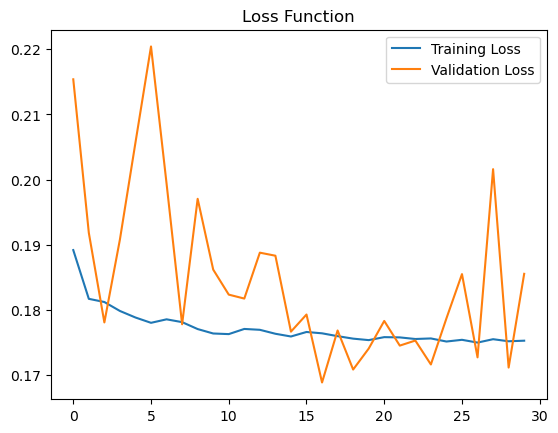

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Training Loss",'Validation Loss'])
plt.title('Loss Function')

Text(0.5, 1.0, 'Accuracy')

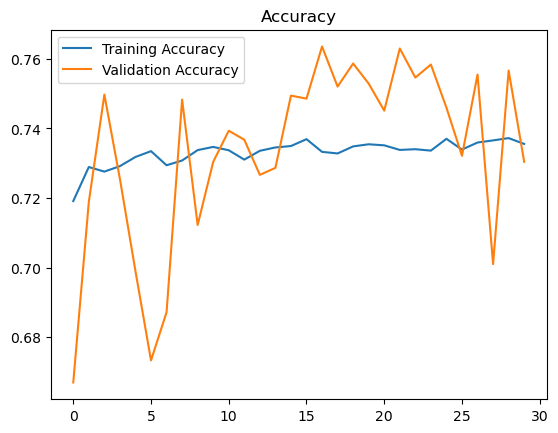

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["Training Accuracy",'Validation Accuracy'])
plt.title('Accuracy')

In [59]:
#Accuracy Score
y_pred = np.where(y_pred > 0.5, 1, 0)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7303921568627451